In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [34]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df.isnull().sum() # no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Classification - check if classes are balanced or imbalanced

`pip install imblearn` to handle classes - imbalance

<Axes: ylabel='count'>

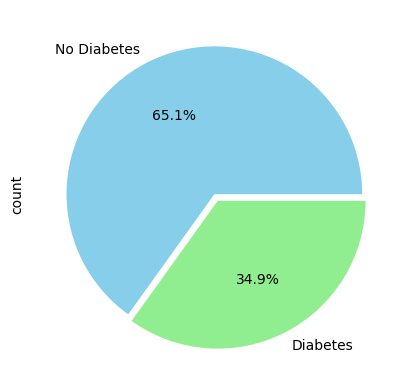

In [36]:
df.Outcome.value_counts().plot(kind='pie', autopct='%.1f%%',
labels =['No Diabetes','Diabetes'],
colors=['skyblue','lightgreen'], explode = [0,0.05])

import libraries

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)
print("training data =>", X_train.shape, X_train.shape)

training data => (614, 8) (614, 8)


In [39]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])
model

Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

Grid seacrh cv - to find best parameters for the model

In [40]:
# ''dt' is the name of the decision tree classifier in the pipeline
params = {
    'dt__criterion':['gini','entropy','log_loss'],
    'dt__max_depth': list(range(5,100,10))
}

grid = GridSearchCV(model, param_grid=params, cv=5, verbose=1)
grid 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

fitting the model


In [41]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

Best Parameters

In [42]:
grid.best_params_

{'dt__criterion': 'entropy', 'dt__max_depth': 5}

All the metrics as a dataframe

In [43]:
result_df = pd.DataFrame(grid.cv_results_)
result_df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.005548,0.002853,0.002150,0.003427,entropy,5,"{'dt__criterion': 'entropy', 'dt__max_depth': 5}",0.747967,0.715447,0.764228,0.747967,0.803279,0.755778,0.028553,1
20,0.005255,0.005274,0.001021,0.001312,log_loss,5,"{'dt__criterion': 'log_loss', 'dt__max_depth': 5}",0.747967,0.715447,0.764228,0.731707,0.803279,0.752526,0.030139,2
0,0.008316,0.002414,0.002232,0.001919,gini,5,"{'dt__criterion': 'gini', 'dt__max_depth': 5}",0.723577,0.747967,0.821138,0.739837,0.688525,0.744209,0.043538,3
16,0.006821,0.003784,0.001383,0.000794,entropy,65,"{'dt__criterion': 'entropy', 'dt__max_depth': 65}",0.739837,0.772358,0.699187,0.731707,0.762295,0.741077,0.025584,4
24,0.004622,0.003393,0.002218,0.002982,log_loss,45,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.723577,0.772358,0.699187,0.691057,0.778689,0.732973,0.036408,5
12,0.009400,0.007768,0.000259,0.000517,entropy,25,"{'dt__criterion': 'entropy', 'dt__max_depth': 25}",0.715447,0.764228,0.691057,0.691057,0.786885,0.729735,0.039120,6
23,0.008002,0.005055,0.001748,0.001653,log_loss,35,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.699187,0.764228,0.682927,0.723577,0.770492,0.728082,0.034639,7
11,0.006398,0.006381,0.000611,0.000760,entropy,15,"{'dt__criterion': 'entropy', 'dt__max_depth': 15}",0.691057,0.780488,0.699187,0.699187,0.762295,0.726443,0.037267,8
27,0.006787,0.000328,0.002109,0.001216,log_loss,75,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.731707,0.715447,0.691057,0.715447,0.770492,0.724830,0.026264,9
21,0.004788,0.004335,0.003422,0.003028,log_loss,15,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.699187,0.756098,0.674797,0.723577,0.754098,0.721551,0.031442,10


extract the model 

In [44]:
Best_model = grid.best_estimator_
Best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5))])

check the confusion matrix 

In [45]:
y_pred = Best_model.predict(X_test)
cf = confusion_matrix(y_test,y_pred)
cf

array([[81, 14],
       [28, 31]], dtype=int64)

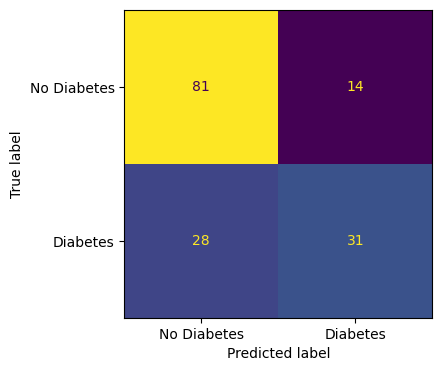

In [46]:
fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay(cf, display_labels=['No Diabetes','Diabetes']).plot(ax=ax, colorbar=False)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        95
           1       0.69      0.53      0.60        59

    accuracy                           0.73       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



plotting grid search results 

<Axes: >

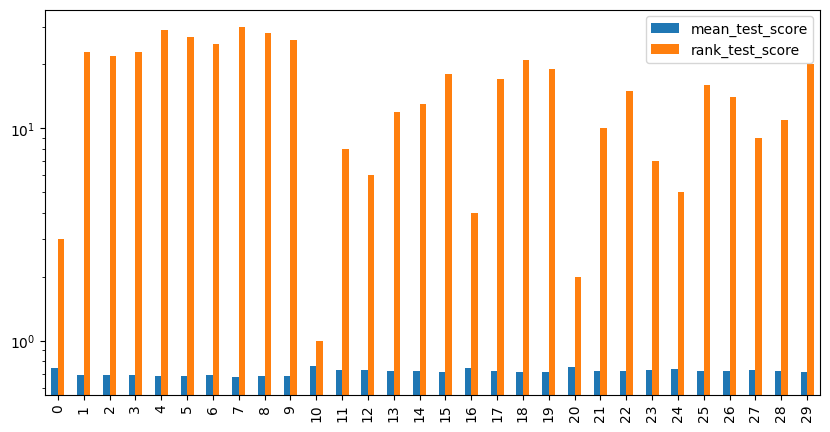

In [48]:
result_df[['mean_test_score','rank_test_score',]].plot(kind='bar', logy=True , figsize=(10, 5))

In [49]:
import joblib 

joblib.dump(Best_model,'diabetes_model.pkl')

['diabetes_model.pkl']

- task => make a gradio app fro this model

Understanding undersampling 

In [50]:
!pip install imblearn

In [51]:
from imblearn.under_sampling import RandomUnderSampler

before undersampling


Outcome
0    405
1    209
Name: count, dtype: int64
after undersampling
Outcome
0    209
1    209
Name: count, dtype: int64


<Axes: ylabel='count'>

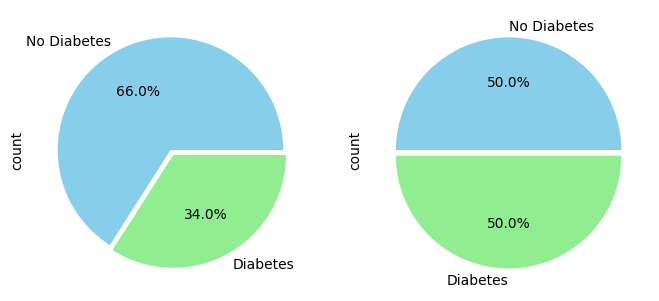

In [52]:
fig , (ax1, ax2) = plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
rus = RandomUnderSampler()
print("before undersampling")
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie', 
                            autopct='%.1f%%',
                            labels =['No Diabetes','Diabetes'],
                            colors=['skyblue','lightgreen'],
                            explode = [0,0.05], 
                            ax=ax1)

X_train, y_train = rus.fit_resample(X_train,y_train)
print("after undersampling")
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie', 
                            autopct='%.1f%%',
                            labels =['No Diabetes','Diabetes'],
                            colors=['skyblue','lightgreen'], 
                            explode = [0,0.05],
                            ax=ax2)